In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim


In [2]:
n_time = 200
x = np.linspace(0, 2*np.pi, n_time)

# Define different phases / frequencies
# phases = np.array([0, 2*np.pi/3, 4*np.pi/3])
omegas = np.array([1,2])

n_genes = 120
cos_values = np.zeros((len(x), n_genes))

for i, omega in enumerate(omegas):
    start_idx = i * n_genes//2
    end_idx = start_idx + n_genes//2
    cos_values[:, start_idx:end_idx] = np.cos(x[:, np.newaxis]*omega)
    # cos_values[:, start_idx:end_idx] = np.cos(x[:, np.newaxis] - phase)

cos_values.shape


(200, 120)

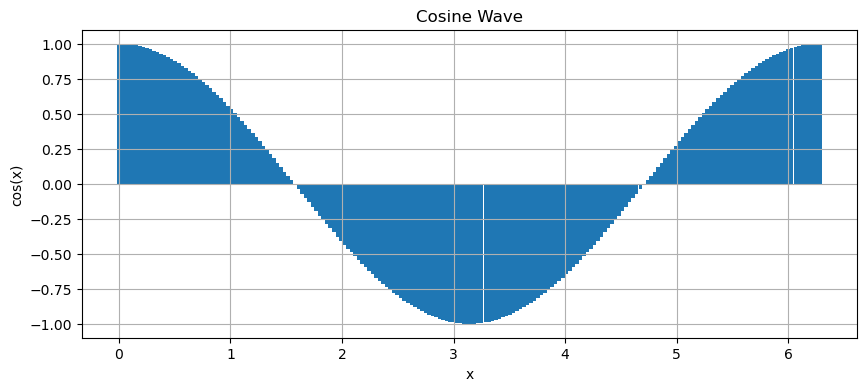

In [3]:
# Plot the cosine wave to visualize the result
plt.figure(figsize=(10, 4))
plt.bar(x, cos_values[:,0], width=(x[-1:]/n_time))
plt.title('Cosine Wave')
plt.xlabel('x')
plt.ylabel('cos(x)')
plt.grid(True)
plt.show()

In [23]:
n_time

200

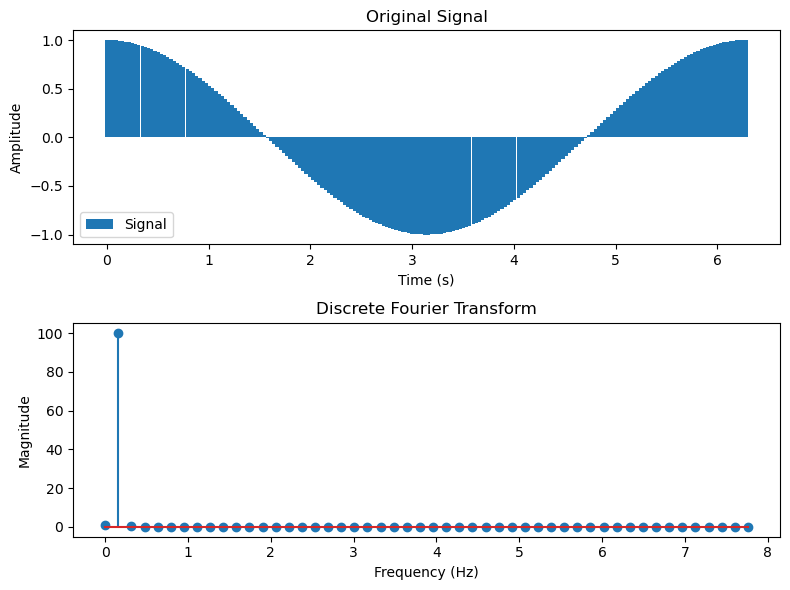

Entropy of the DFT: 0.11351237105529868


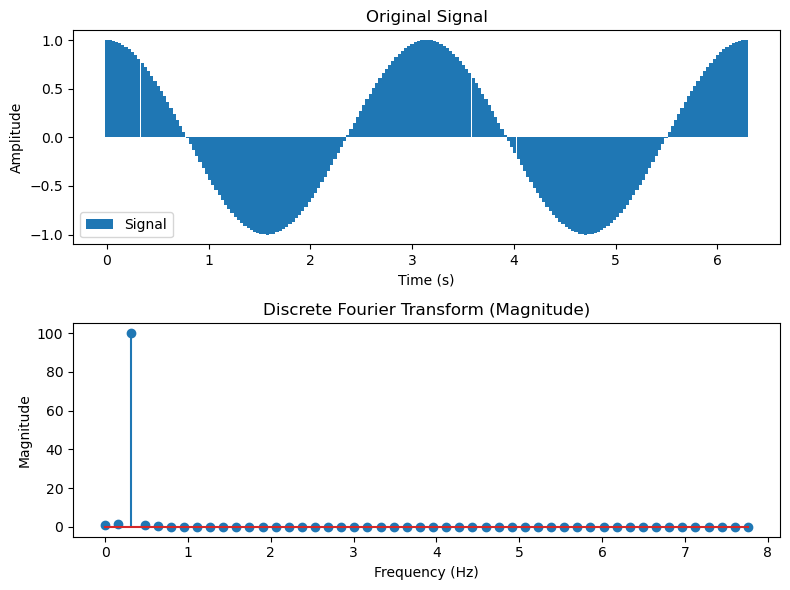

Entropy of the DFT: 0.2638212562767838


In [4]:
# Compute the DFT
dft = np.fft.rfft(cos_values[:,0])  # DFT of the signal
frequencies = np.fft.rfftfreq(n_time, d=x[1] - x[0])  # Frequency bins
# Magnitude of the DFT
magnitude = np.abs(dft)
# Plot the original signal
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.bar(x, cos_values[:,0], width=(x[-1:]/n_time), label="Signal")
plt.title("Original Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
# Plot the magnitude of the DFT
plt.subplot(2, 1, 2)
plt.stem(frequencies[:n_time//4], magnitude[:n_time//4])
plt.title("Discrete Fourier Transform")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.tight_layout()
plt.show()

probabilities = magnitude / np.sum(magnitude)
eps = 1e-12
entropy = -np.sum(probabilities * np.log(probabilities + eps))
print(f"Entropy of the DFT: {entropy}")


dft = np.fft.rfft(cos_values[:,60])  
frequencies = np.fft.rfftfreq(n_time, d=x[1] - x[0]) 
magnitude = np.abs(dft)
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.bar(x, cos_values[:,60], width=(x[-1:]/n_time), label="Signal")
plt.title("Original Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.subplot(2, 1, 2)
plt.stem(frequencies[:n_time//4], magnitude[:n_time//4])
plt.title("Discrete Fourier Transform (Magnitude)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.tight_layout()
plt.show()

probabilities = magnitude / np.sum(magnitude)
entropy = -np.sum(probabilities * np.log(probabilities + eps))
print(f"Entropy of the DFT: {entropy}")

# dft = np.fft.rfft(cos_values[:,80])  
# frequencies = np.fft.rfftfreq(n_time, d=x[1] - x[0])  
# magnitude = np.abs(dft)
# plt.figure(figsize=(8, 6))
# plt.subplot(2, 1, 1)
# plt.bar(x, cos_values[:,80], width=(x[-1:]/n_time), label="Signal")
# plt.title("Original Signal")
# plt.xlabel("Time (s)")
# plt.ylabel("Amplitude")
# plt.legend()
# plt.subplot(2, 1, 2)
# plt.stem(frequencies[:n_time//4], magnitude[:n_time//4])
# plt.title("Discrete Fourier Transform (Magnitude)")
# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Magnitude")
# plt.tight_layout()
# plt.show()

# probabilities = magnitude / np.sum(magnitude)
# entropy = -np.sum(probabilities * np.log(probabilities + eps))
# print(f"Entropy of the DFT: {entropy}")

In [55]:
entropy = 0
for col in range(cos_values.shape[1]):
    # DFT
    dft = np.fft.rfft(cos_values[:,col])  
    frequencies = np.fft.rfftfreq(n_time, d=x[1] - x[0]) 
    magnitude = np.abs(dft)
    probabilities = magnitude / np.sum(magnitude)
    entropy_col = -np.sum(probabilities * np.log(probabilities + 1e-12))
    entropy += entropy_col
    
print(f"Total entropy of original dataset: {entropy}")

Total entropy of original dataset: 22.640017639924945


In [5]:
# Create random permutation of rows
np.random.seed(42)  # For reproducibility
dataset = np.zeros_like(cos_values)
perm_indices = np.random.permutation(cos_values.shape[0])

# Apply permutation to create new dataset
for i in range(cos_values.shape[0]):
    dataset[i,:] = cos_values[perm_indices[i],:]

print(dataset.shape)


(200, 120)


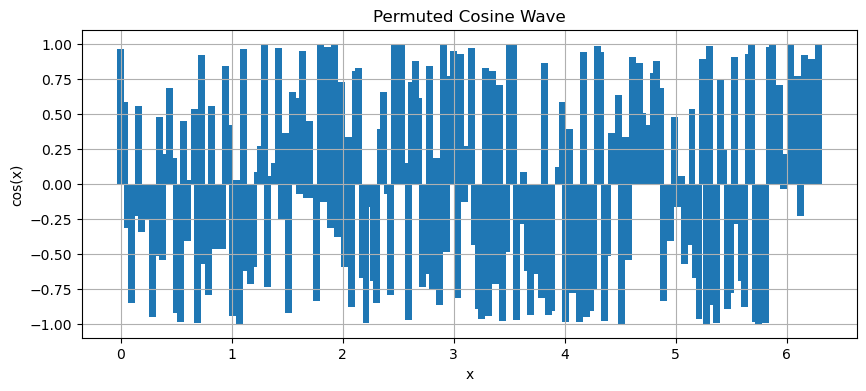

In [6]:
# Plot the cosine wave to visualize the result
plt.figure(figsize=(10, 4))
plt.bar(x, dataset[:,60], width=(2*np.pi/100))
plt.title('Permuted Cosine Wave')
plt.xlabel('x')
plt.ylabel('cos(x)')
plt.grid(True)
plt.show()

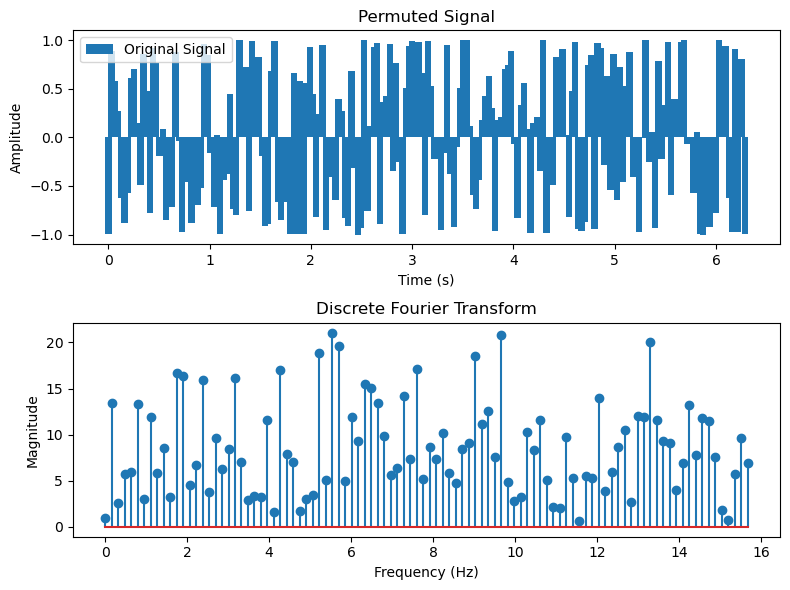

Entropy of the DFT: 4.440898650547752


In [9]:
# Compute the DFT
dft = np.fft.rfft(dataset[:,0])  # DFT of the signal
frequencies = np.fft.rfftfreq(len(dataset[:,0]), d=x[1] - x[0])  # Frequency bins
# Magnitude of the DFT
magnitude = np.abs(dft)
# Plot the original signal
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.bar(x, dataset[:,34], width=(2*np.pi/100),label="Original Signal")
plt.title("Permuted Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
# Plot the magnitude of the DFT
plt.subplot(2, 1, 2)
plt.stem(frequencies[:len(dataset[:,0])//2], magnitude[:len(dataset[:,0])//2])
plt.title("Discrete Fourier Transform")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.tight_layout()
plt.show()

# Compute entropy
probabilities = magnitude / np.sum(magnitude)
eps = 1e-12
entropy = -np.sum(probabilities * np.log(probabilities + eps))
print(f"Entropy of the DFT: {entropy.item()}")

In [56]:
entropy = 0
for col in range(dataset.shape[1]):
    # DFT
    dft = np.fft.rfft(dataset[:,col])  
    frequencies = np.fft.rfftfreq(n_time, d=x[1] - x[0]) 
    magnitude = np.abs(dft)
    probabilities = magnitude / np.sum(magnitude)
    entropy_col = -np.sum(probabilities * np.log(probabilities + 1e-12))
    entropy += entropy_col
    
print(f"Total entropy of permuted dataset: {entropy}")

Total entropy of permuted dataset: 533.7002765934822


In [12]:
# Convert to torch
dataset_torch = torch.tensor(dataset, dtype=torch.float32) 
dataset_torch.shape

torch.Size([200, 120])

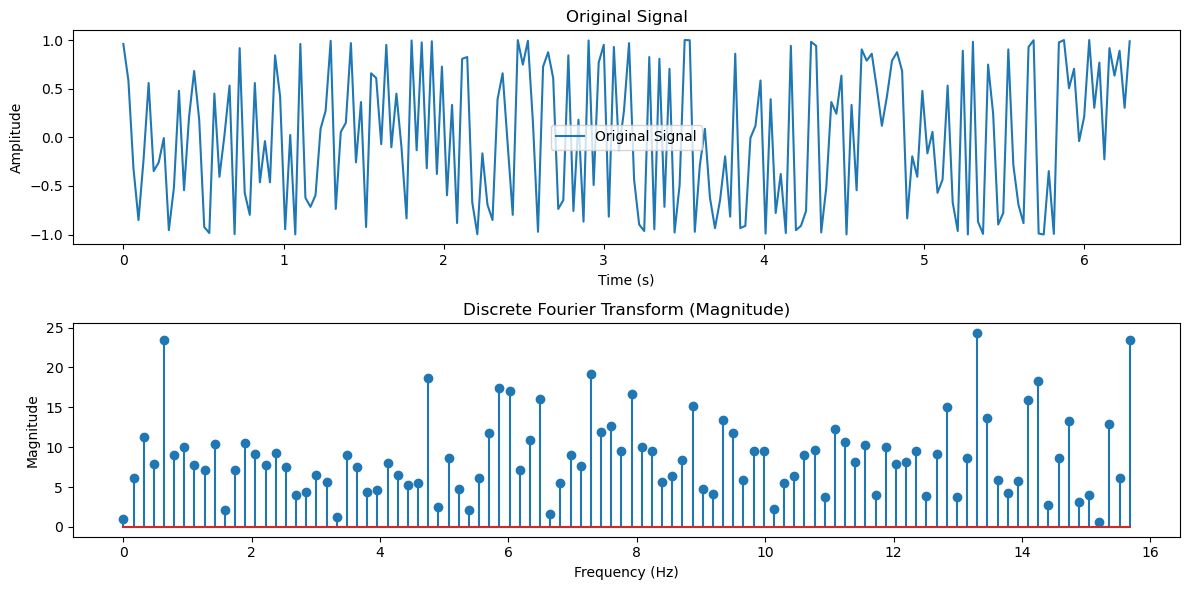

In [ ]:
# Test torch DFT
dft = torch.fft.rfft(dataset_torch[:,60])  # Forward Fourier Transform
frequencies = torch.fft.rfftfreq(n_time, d=(x[1] - x[0]).item())  # Frequency bins
magnitude = torch.abs(dft)

# Plot the original signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(x, dataset_torch[:,60].numpy(), label="Original Signal")
plt.title("Original Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

# Plot the magnitude of the DFT
plt.subplot(2, 1, 2)
plt.stem(frequencies[:n_time//2].numpy(), magnitude[:n_time//2].numpy())
plt.title("Discrete Fourier Transform (Magnitude)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.tight_layout()
plt.show()

# Compute entropy
frequencies = torch.fft.rfftfreq(n_time, d=(x[1] - x[0]).item())  # Frequency bins
magnitude = torch.abs(dft)
probabilities = magnitude / torch.sum(magnitude)
eps = 1e-12
entropy = -torch.sum(probabilities * torch.log(probabilities + eps))

print(f"Entropy of the DFT: {entropy.item()}")

In [13]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 60), 
            nn.ReLU(),
            nn.Linear(60, 40), 
            nn.ReLU(),
            nn.Linear(40, 20), 
            nn.ReLU(),
            nn.Linear(20, 1)   
        )

        self.decoder = nn.Sequential(
            nn.Linear(1, 20),    
            nn.ReLU(),
            nn.Linear(20, 40),  
            nn.ReLU(),
            nn.Linear(40, 60),
            nn.ReLU(),
            nn.Linear(60, input_dim),
            nn.Sigmoid()         
        )
        
    def forward(self, x):
        latent = self.encoder(x)
        reconstructed = self.decoder(latent)
        return latent, reconstructed

In [14]:
# Sort the dataset according to latent pseudotime 
def reorder_by_pseudotime(dataset, latent_values):
    order = torch.argsort(latent_values.squeeze())  
    return dataset[order]

# Compute the DFT and entropy
def compute_entropy(dft):
    magnitude = torch.abs(dft)
    probabilities = magnitude / torch.sum(magnitude)
    
    # Avoid log(0) by adding eps
    eps = 1e-12
    entropy = -torch.sum(probabilities * torch.log(probabilities + eps))
    return entropy

In [50]:
autoencoder = Autoencoder(input_dim=dataset_torch.shape[1])
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
num_epochs = 250
mse_loss = []
ent = []
lambda_entropy = 0.1
# noisy_input = dataset_torch + 0.01 * torch.randn_like(dataset_torch)

for epoch in range(num_epochs):
    autoencoder.train()
    optimizer.zero_grad()
    
    latent_values, reconstructed = autoencoder(dataset_torch)
    # Reorder the RECONSTRUCTED dataset based on latent time
    reordered_dataset = reorder_by_pseudotime(dataset_torch, latent_values)
  
    # entropy = torch.Tensor([0])
    entropy = torch.tensor(0.0)
    for i in range(reordered_dataset.size(1)):
        # Compute the DFT 
        dft = torch.fft.rfft(reordered_dataset[:,i])
        # Compute entropy 
        entropy += compute_entropy(dft)
    # Total loss: reconstruction loss + entropy minimization
    total_loss = entropy + nn.MSELoss()(reconstructed, dataset_torch)
    mse_loss.append(nn.MSELoss()(reconstructed, dataset_torch).item())
    ent.append(entropy.item())
    total_loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f"Epoch [{epoch}/{num_epochs}], Loss: {total_loss.item():.4f}, Entropy: {entropy:.4f}")


Epoch [0/250], Loss: 490.7748, Entropy: 490.0276
Epoch [100/250], Loss: 487.7972, Entropy: 487.4661
Epoch [200/250], Loss: 347.2969, Entropy: 346.9856


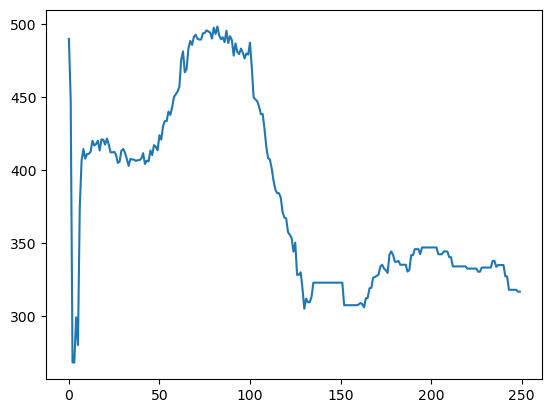

In [51]:
plt.plot(ent)

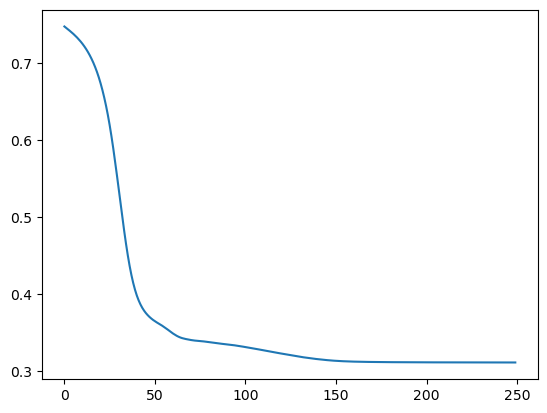

In [52]:
plt.plot(mse_loss)

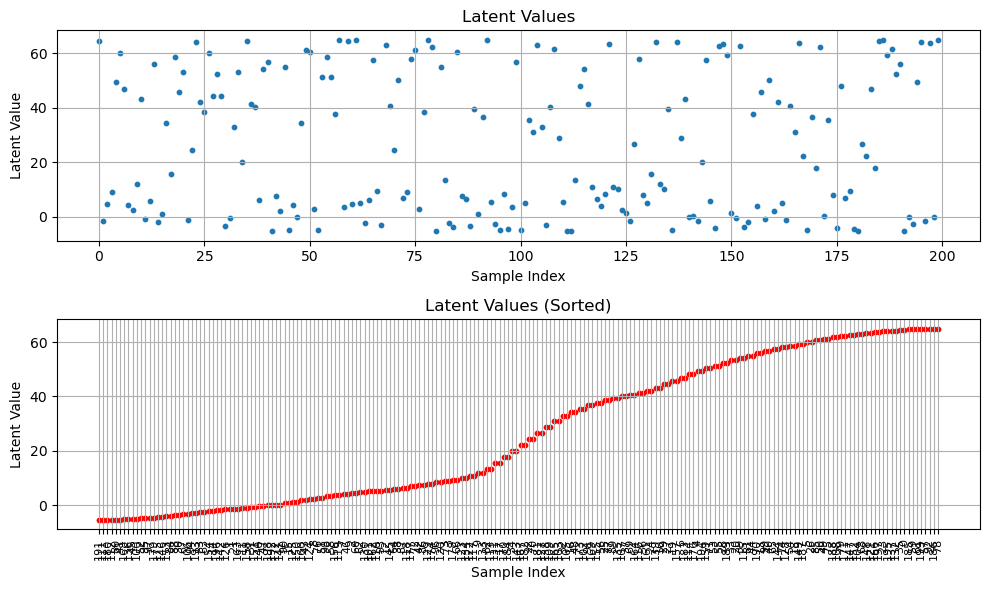

In [45]:
plt.figure(figsize=(10, 6))
# Plot original latent values
plt.subplot(2, 1, 1)
plt.scatter(range(len(latent_values)), latent_values.detach().numpy(), s=10)
plt.title("Latent Values")
plt.xlabel("Sample Index")
plt.ylabel("Latent Value")
plt.grid(True)

# Plot sorted latent values 
sorted_latent_values, sorted_indices = torch.sort(latent_values.squeeze())
plt.subplot(2, 1, 2)
plt.scatter(range(len(sorted_latent_values)), sorted_latent_values.detach().numpy(), s=10, color='r')
plt.xticks(range(len(sorted_latent_values)), sorted_indices.numpy(), rotation='vertical', fontsize=8)
plt.title("Latent Values (Sorted)")
plt.xlabel("Sample Index")
plt.ylabel("Latent Value")
plt.grid(True)

plt.tight_layout()
plt.show()


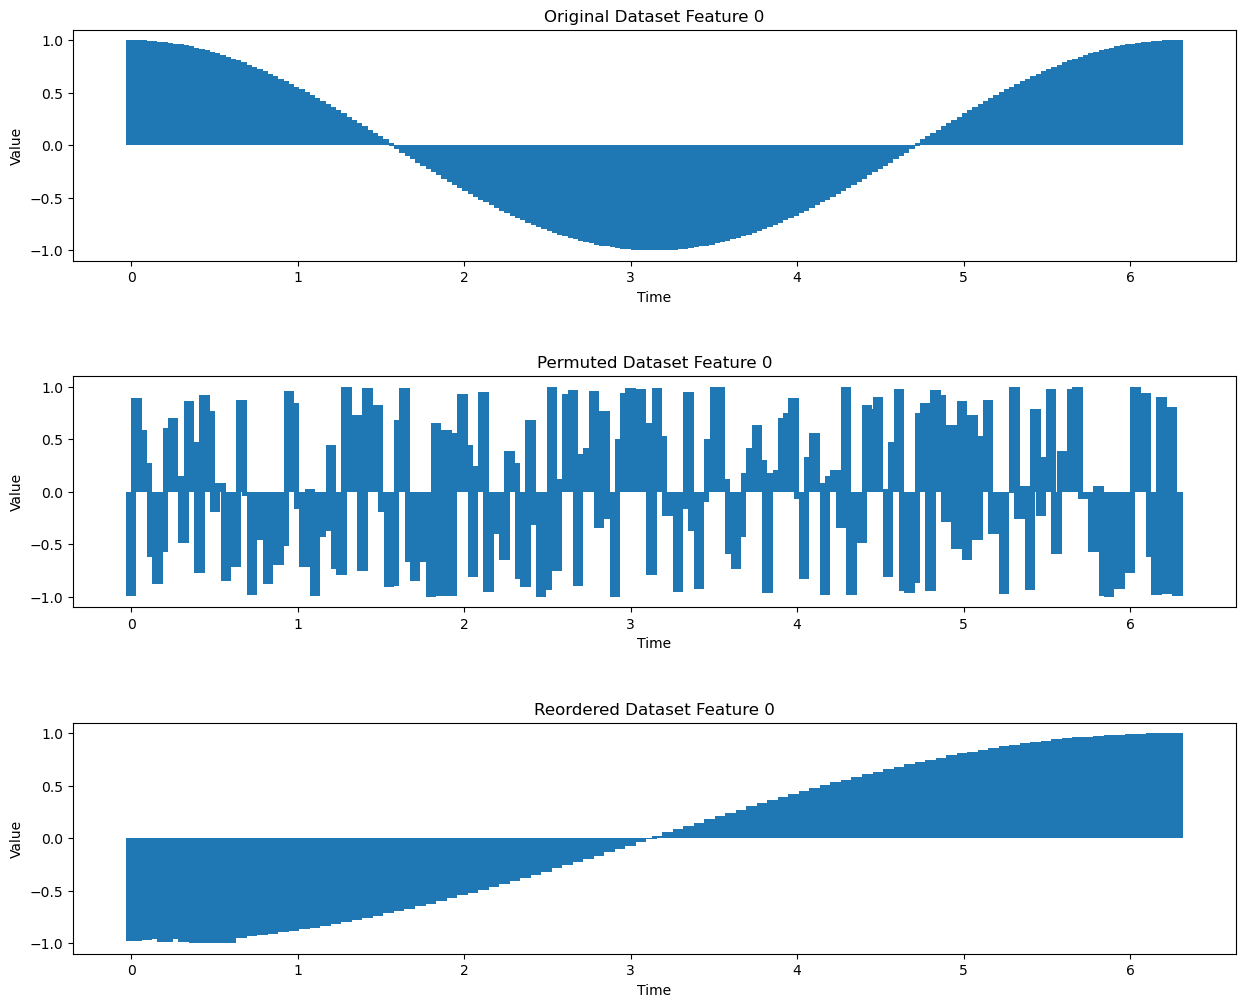

Entropy of the DFT: 3.6284215791047183


In [53]:
gi = 0
plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)
plt.bar(x, cos_values[:,gi], width=(2*np.pi/100))
plt.title(f"Original Dataset Feature {gi}")
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(3, 1, 2)
plt.bar(x, dataset[:,gi], width=(2*np.pi/100))
plt.title(f"Permuted Dataset Feature {gi}")
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(3, 1, 3)
reordered_dataset_2 = reorder_by_pseudotime(dataset_torch, latent_values)
reordered_dataset_np_2 = reordered_dataset_2.detach().numpy()
plt.bar(x, reordered_dataset_np_2[:,gi], width=(2*np.pi/100))
plt.title(f"Reordered Dataset Feature {gi}")
plt.xlabel("Time")
plt.ylabel("Value")

# plt.subplot(4, 1, 4)
# reordered_dataset_np = reordered_dataset.detach().numpy()
# plt.bar(x, reordered_dataset_np[:,gi], width=(2*np.pi/100))
# plt.title(f"Reconstructed Dataset Feature {gi}")
# plt.xlabel("Time")
# plt.ylabel("Value")

plt.subplots_adjust(hspace=0.5)  # Increase vertical spacing between subplots
plt.show()


dft = np.fft.rfft(reordered_dataset_np_2[:,gi])  # DFT of the signal
frequencies = np.fft.rfftfreq(len(reordered_dataset_np_2[:,gi]), d=x[1] - x[0])  # Frequency bins
magnitude = np.abs(dft)

# Normalize to get a probability distribution
# probabilities = magnitude / np.sum(magnitude)
# # Avoid log(0) by adding a small constant (numerical stability)
# eps = 1e-12
# entropy = -np.sum(probabilities * np.log(probabilities + eps))

# Normalize to get a probability distribution
probabilities = magnitude / np.sum(magnitude)
eps = 1e-12
entropy = -np.sum(probabilities * np.log(probabilities + eps))

print(f"Entropy of the DFT: {entropy.item()}")

<StemContainer object of 3 artists>

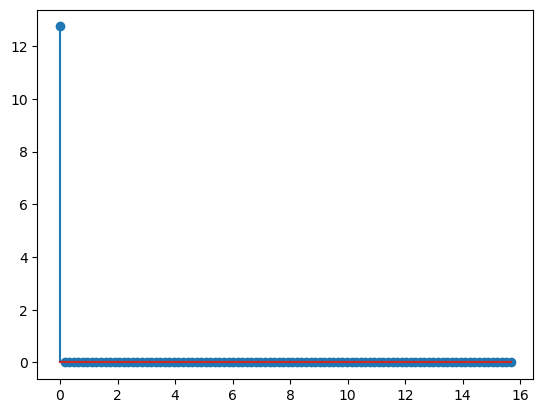

In [24]:
plt.stem(frequencies.detach().numpy()[:n_time//2], magnitude.detach().numpy()[:n_time//2])

In [ ]:
n_time = 100
x = np.linspace(0, 2*np.pi, n_time)
omegas = np.array([1,1,1])
n_genes = 120
cos_values = np.zeros((len(x), n_genes))
# Generate 17 samples for each phase
for i, omega in enumerate(omegas):
    start_idx = i * n_genes//3
    end_idx = start_idx + n_genes//3
    cos_values[:, start_idx:end_idx] = np.cos(x[:, np.newaxis]*omega)
    
# Create random permutation of rows
np.random.seed(42)  # For reproducibility
dataset = np.zeros_like(cos_values)
perm_indices = np.random.permutation(cos_values.shape[0])
# Apply permutation to create new dataset
for i in range(cos_values.shape[0]):
    dataset[i,:] = cos_values[perm_indices[i],:]
    
# Convert to torch
dataset_torch = torch.tensor(dataset, dtype=torch.float32) 
dataset_torch.shape

In [132]:
autoencoder = Autoencoder(input_dim=dataset_torch.shape[1])
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
num_epochs = 500
mse_loss = []
ent = []
for epoch in range(num_epochs):
    autoencoder.train()
    optimizer.zero_grad()

    latent_values, reconstructed = autoencoder(dataset_torch)
    # Reorder the RECONSTRUCTED dataset based on latent time
    reordered_dataset = reorder_by_pseudotime(reconstructed, latent_values)

    # entropy = torch.Tensor([0])
    entropy = torch.tensor(0.0)
    for i in range(reordered_dataset.size(1)):
        # Compute the DFT 
        dft = torch.fft.rfft(reordered_dataset[:, i])
        # Compute entropy 
        entropy = compute_entropy(dft)
    # Total loss: reconstruction loss + entropy minimization
    total_loss = entropy + nn.MSELoss()(reconstructed, dataset_torch)
    mse_loss.append(nn.MSELoss()(reconstructed, dataset_torch).item())
    ent.append(entropy.item())
    total_loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch [{epoch}/{num_epochs}], Loss: {total_loss.item():.4f}, Entropy: {entropy:.4f}")


Epoch [0/500], Loss: 0.7265, Entropy: 0.1464
Epoch [100/500], Loss: 0.5063, Entropy: 0.0000
Epoch [200/500], Loss: 0.5055, Entropy: 0.0005
Epoch [300/500], Loss: 0.2684, Entropy: 0.1521
Epoch [400/500], Loss: 0.0739, Entropy: 0.0571


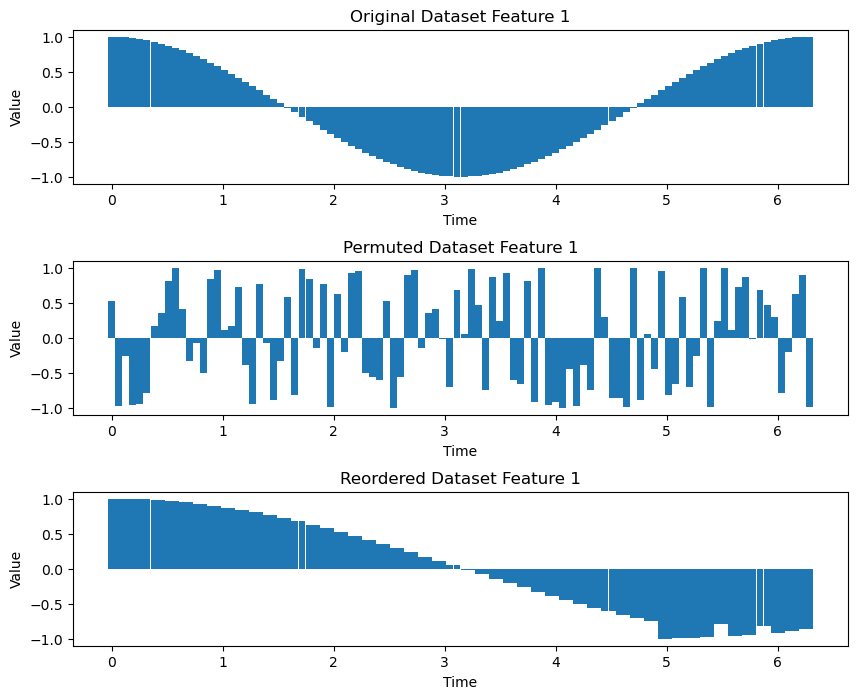

Entropy of the DFT: 0.00012576273002196103


In [143]:
gi = 0
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.bar(x, cos_values[:,gi], width=(2*np.pi/100))
plt.title("Original Dataset Feature 1")
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(3, 1, 2)
plt.bar(x, dataset[:,gi], width=(2*np.pi/100))
plt.title("Permuted Dataset Feature 1")
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(3, 1, 3)
reordered_dataset_2 = reorder_by_pseudotime(dataset_torch, latent_values)
reordered_dataset_np = reordered_dataset_2.detach().numpy()
plt.bar(x, reordered_dataset_np[:,gi], width=(2*np.pi/100))
plt.title("Reordered Dataset Feature 1")
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplots_adjust(hspace=0.5)  # Increase vertical spacing between subplots
plt.show()


dft = torch.fft.rfft(reordered_dataset[:,gi])  # Forward Fourier Transform
frequencies = torch.fft.rfftfreq(len(reordered_dataset[:,gi]), d=(x[1] - x[0]).item())  # Frequency bins
magnitude = torch.abs(dft)
# Normalize to get a probability distribution
probabilities = magnitude / torch.sum(magnitude)
eps = 1e-12
entropy = -torch.sum(probabilities * torch.log(probabilities + eps))

print(f"Entropy of the DFT: {entropy.item()}")